$\textbf{PROGRAMMING ASSIGNMENT}$
---
Instructions:
-

1. Read the article: https://www.sciencedirect.com/science/article/abs/pii/S0031320322001753
2. Replicate the study using the same dataset.
3. Read articles about Adjusted Rand Index, Normalized Mutual Information, and Folkes-Mallows Index (only use paper published in IEEE, sciencedirect, springerlink, Taylor Francis).
4. Aside from the Adjusted Rand Index (ARI), and Normalized Mutual Information (NMI), use the Folkes-Mallows Index (FMI), and compare the result of each performance index.
5. Compare and contrast each performance index, what are the advantages and disadvantages of ARI, NMI, and FMI, and when to use each?
6. Using Kmodes and Hierarchical Clustering, use the same dataset and perform categorical data clustering, use FMI, ARI, and NMI for the comparison of performance.
7. Write your report using Latex. Your report should be focused on the "why's and the what's" of each performance metrices (i.e. why is FMI always greater than ARI and NMI? What's the problem with ARI and NMI?).

In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

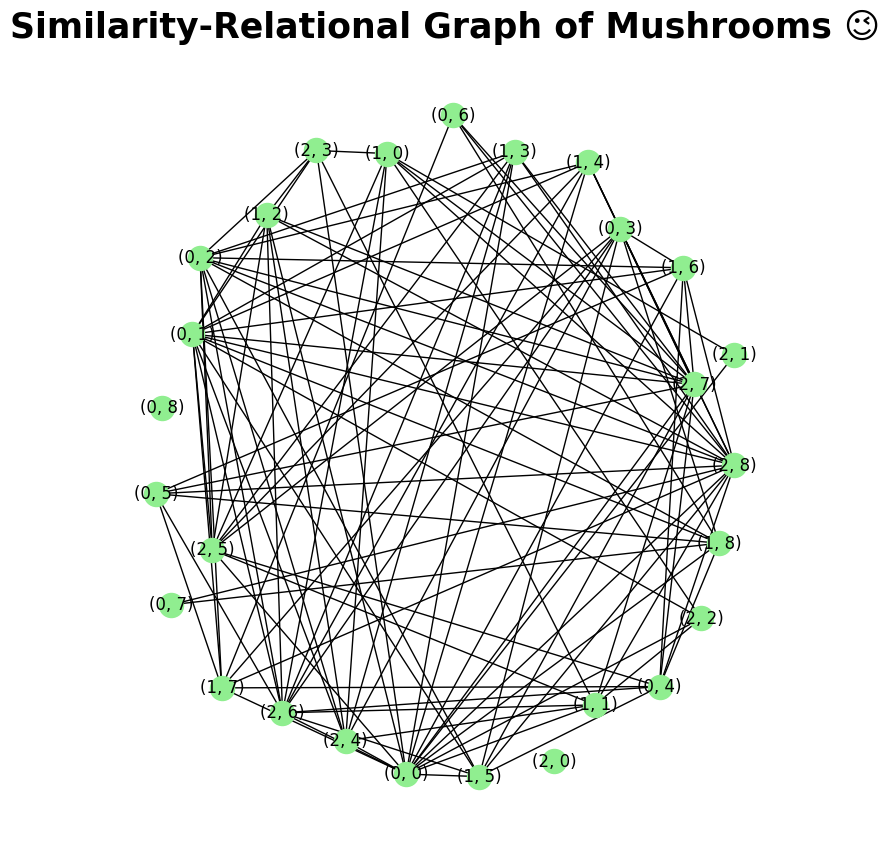

c:\Users\USER\Desktop\Jupyter\DATA_ANALYTICS\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:662: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


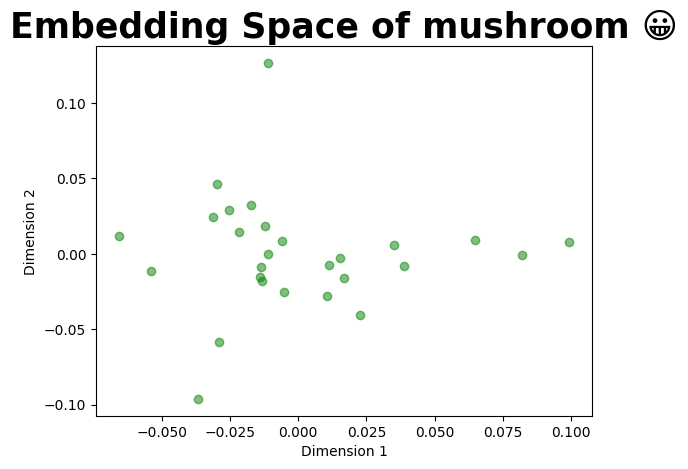

Embedding Matrix:
 [[-1.10745635e-02  1.26635008e-01]
 [ 6.46484551e-02  9.36831787e-03]
 [-2.91451452e-02 -5.81746981e-02]
 [-5.37073278e-02 -1.11608149e-02]
 [-3.68143928e-02 -9.61618991e-02]
 [-2.96213585e-02  4.64667764e-02]
 [ 1.52223838e-02 -2.41984710e-03]
 [-1.20804418e-02  1.82814930e-02]
 [ 1.67147320e-02 -1.56540660e-02]
 [ 8.20613236e-02 -4.60800938e-04]
 [ 1.07131851e-02 -2.76421619e-02]
 [-6.57615035e-02  1.15403002e-02]
 [ 3.50560142e-02  5.81774956e-03]
 [-1.40551080e-02 -1.55871654e-02]
 [-2.53234562e-02  2.89604829e-02]
 [ 2.28133588e-02 -4.05158430e-02]
 [-1.73458383e-02  3.26425538e-02]
 [-6.04723191e-03  8.26378487e-03]
 [-1.35541325e-02 -8.48089249e-03]
 [-1.32111931e-02 -1.78818015e-02]
 [ 1.14281266e-02 -7.53825196e-03]
 [ 9.93609350e-02  8.11666114e-03]
 [-5.20692454e-03 -2.54079505e-02]
 [ 3.85988193e-02 -8.23935713e-03]
 [-3.12266129e-02  2.47937518e-02]
 [-1.08843393e-02  8.02145690e-05]
 [-2.15577637e-02  1.43584560e-02]]


In [14]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def construct_similarity_graph(X):

    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embedding(X, embedding_dim=2):

    # Construct similarity-relational graph
    G = construct_similarity_graph(X)
    
    # Visualize the graph
    plt.figure(figsize=(7, 8))
    nx.draw(G, with_labels=True, node_color='lightgreen')
    plt.title('Similarity-Relational Graph of Mushrooms \N{winking face}', fontweight='bold', fontsize=25)
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embedding = SpectralEmbedding(n_components=embedding_dim)
    embedding_matrix = spectral_embedding.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space

    plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1], color='green', alpha=0.5)
    plt.title('Embedding Space of mushroom \U0001f600', fontweight='bold', fontsize=25)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embedding_matrix

# Example usage
# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embedding_matrix = graph_embedding(X)
print("Embedding Matrix:\n", embedding_matrix)


<br><br>
$\textbf{Adjusted Rand Index (ARI):}$

$\textbf{Advantages:}$
- Well-established metric, widely used.
- Takes into account the chance agreement between labels.
- Bounded between -1 (worst) and 1 (perfect agreement).

$\textbf{Disadvantages:}$
- Requires knowing the "ground truth" labels for the data (which might not always be available).
- Sensitive to the number of clusters, especially for small datasets.
- It is not normalized and can take negative values, making interpretation challenging.

$\textbf{When to use:}$
- Comparing different clustering algorithms on the same dataset.
- You have ground truth labels for your data.
<br>

$\textbf{Normalized Mutual Information (NMI):}$

$\textbf{Advantages:}$
- Similar advantages to ARI in terms of interpretability and handling chance agreement.
- Also bounded between 0 (worst) and 1 (perfect agreement).
- Less sensitive to the number of clusters compared to ARI.

$\textbf{Disadvantages:}$
- Shares the disadvantage of requiring ground truth labels.
- Can be computationally expensive for large datasets.

$\textbf{When to use:}$
- You have ground truth labels for your data.
- Concerned about the number of clusters affecting the evaluation (especially for many clusters).
<br>

$\textbf{Folkes-Mallows Index (FMI):}$

$\textbf{Advantages:}$
- Does not require ground truth labels (useful for unsupervised learning).
- Upper bounded by 1 (similar to ARI and NMI).
- Combines precision and recall for cluster evaluation.
$\textbf{Disadvantages:}$
- Less widely used compared to ARI and NMI, so interpretation might be less familiar.
- Might not be suitable for all types of clustering problems.

$\textbf{When to use:}$
- FMI is useful when you want a balanced evaluation of both precision and recall in clustering.
- You don't have ground truth labels for your data (unsupervised learning).
- Interested in a metric that considers both precision and recall of clustering.

In [ ]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.impute import SimpleImputer

# Define a function to evaluate clustering performance
def evaluate_clustering(X, y_true, method='kmodes'):
    if method == 'kmodes':
        clustering = KModes(n_clusters=len(np.unique(y_true)), init='Cao', n_init=5, verbose=0)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true)))
    else:
        raise ValueError("Invalid clustering method. Use 'kmodes' or 'hierarchical'.")
    
    y_pred = clustering.fit_predict(X)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    fmi = fowlkes_mallows_score(y_true, y_pred)
    
    return ari, nmi, fmi

# One-hot encode categorical features if needed
X_encoded = pd.get_dummies(X)

# Impute missing values if needed
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Convert y to a 1-dimensional pandas Series
y_series = y.squeeze()

# Perform clustering and evaluate with different methods
ari_kmodes, nmi_kmodes, fmi_kmodes = evaluate_clustering(X_imputed, y_series, method='kmodes')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y_series, method='hierarchical')

# Print the results
print("KModes Clustering:")
print("Adjusted Rand Index (ARI):", ari_kmodes)
print("Normalized Mutual Information (NMI):", nmi_kmodes)
print("Folkes-Mallows Index (FMI):", fmi_kmodes)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)


KModes Clustering:
Adjusted Rand Index (ARI): 0.36748616012340063
Normalized Mutual Information (NMI): 0.6915333229576721
Folkes-Mallows Index (FMI): 0.42485959928639194

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.4818572638479213
Normalized Mutual Information (NMI): 0.7714741801659014
Folkes-Mallows Index (FMI): 0.5238794514629941
